In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
data_dir = 'data/asl_alphabet_train/asl_alphabet_train'  
img_size = (64, 64)
batch_size = 32


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)


In [6]:
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 69600 images belonging to 29 classes.


In [7]:
val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 17400 images belonging to 29 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,893 (6.21 MB)

 Trainable params: 1,628,893 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

c:\Users\Devika\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 260s 119ms/step - accuracy: 0.1918 - loss: 2.7373 - val_accuracy: 0.4349 - val_loss: 1.7677
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 237s 109ms/step - accuracy: 0.4905 - loss: 1.5142 - val_accuracy: 0.5097 - val_loss: 1.4636
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 239s 110ms/step - accuracy: 0.5946 - loss: 1.1757 - val_accuracy: 0.5760 - val_loss: 1.3055
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 245s 113ms/step - accuracy: 0.6596 - loss: 0.9652 - val_accuracy: 0.6098 - val_loss: 1.1842
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 238s 109ms/step - accuracy: 0.7020 - loss: 0.8380 - val_accuracy: 0.6347 - val_loss: 1.1737
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 241s 111ms/step - accuracy: 0.7416 - loss: 0.7284 - val_accuracy: 0.6729 - val_loss: 1.0419
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 241s 111ms/step - accuracy: 0.7732 - loss: 0.6340 - val_accuracy: 0.6665 - val_loss: 1.0576
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 236s 108ms/step - ac

In [17]:
model.save('asl_model.h5')

In [12]:
val_data.reset()
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

544/544 ━━━━━━━━━━━━━━━━━━━━ 36s 66ms/step


In [13]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.04      0.03      0.03       600
           1       0.04      0.06      0.05       600
           2       0.05      0.05      0.05       600
           3       0.04      0.04      0.04       600
           4       0.05      0.07      0.06       600
           5       0.03      0.03      0.03       600
           6       0.02      0.02      0.02       600
           7       0.03      0.04      0.04       600
           8       0.03      0.02      0.02       600
           9       0.02      0.01      0.02       600
          10       0.03      0.03      0.03       600
          11       0.02      0.02      0.02       600
          12       0.05      0.06      0.05       600
          13       0.04      0.04      0.04       600
          14       0.05      0.04      0.04       600
          15       0.04      0.04      0.04       600
          16       0.04      0.03      0.04       600
          17       0.03    

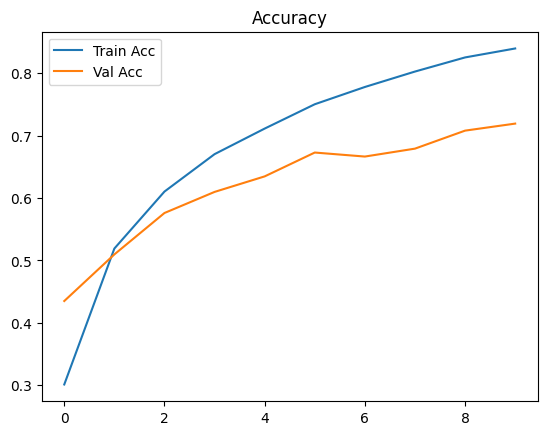

In [14]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()

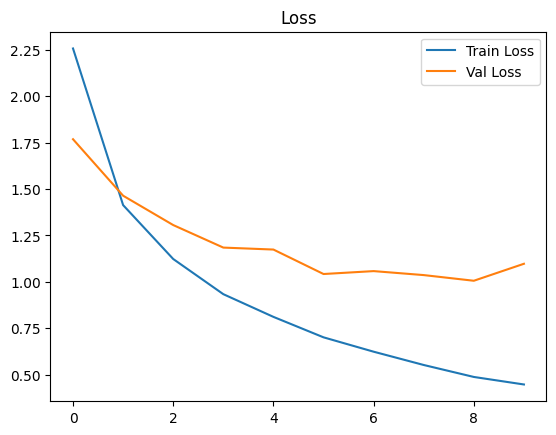

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [20]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

model = load_model('asl_model.h5')
test_dir = 'data/asl_alphabet_test/asl_alphabet_test'  
class_labels = list(train_data.class_indices.keys())

for img_file in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_file)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    print(f"Image: {img_file} → Predicted Sign: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Image: A_test.jpg → Predicted Sign: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: B_test.jpg → Predicted Sign: B
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: C_test.jpg → Predicted Sign: C
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: D_test.jpg → Predicted Sign: D
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: E_test.jpg → Predicted Sign: E
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: F_test.jpg → Predicted Sign: F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: G_test.jpg → Predicted Sign: G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: H_test.jpg → Predicted Sign: H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: I_test.jpg → Predicted Sign: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: J_test.jpg → Predicted Sign: J
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: K_test.jpg → Predicted Sign: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Image: L_test.jpg → Predicted Sign: L
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: M_test.jpg → Predicted Sign: N
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


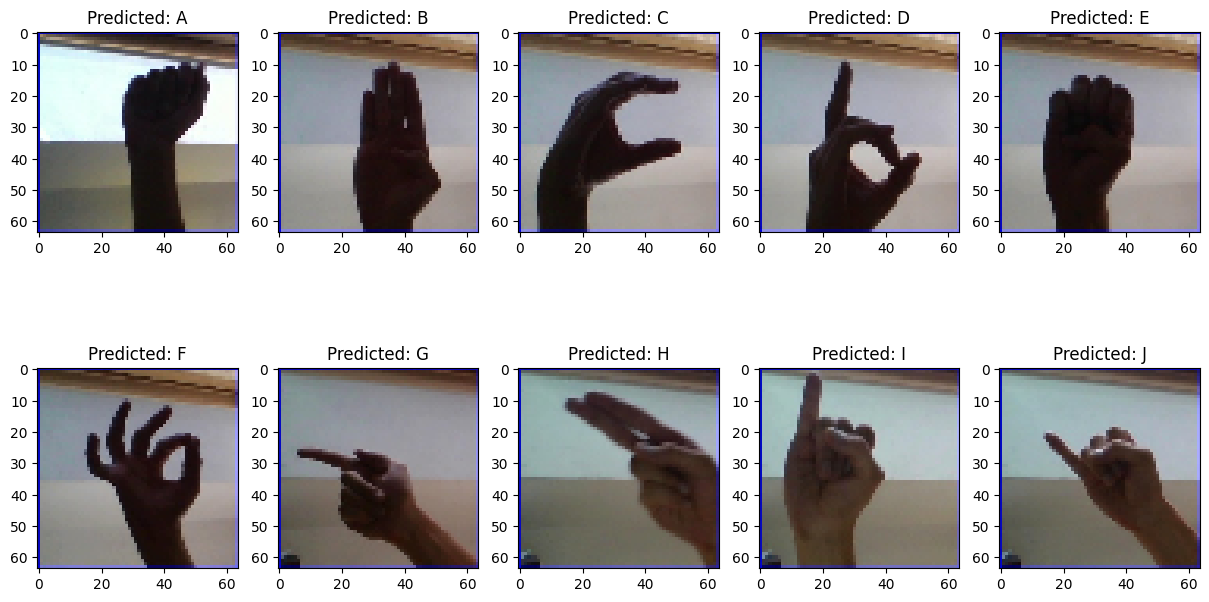

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load model and get class labels (you already have this)
model = load_model('asl_model.h5')
test_dir = 'data/asl_alphabet_test/asl_alphabet_test'
class_labels = list(train_data.class_indices.keys())

# List only image files
img_files = [f for f in os.listdir(test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Display first 10 test images with predictions
plt.figure(figsize=(15, 8))
for i, img_file in enumerate(img_files[:10]):
    img_path = os.path.join(test_dir, img_file)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
